## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

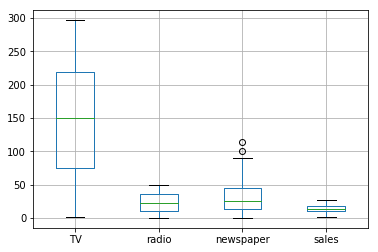

In [3]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

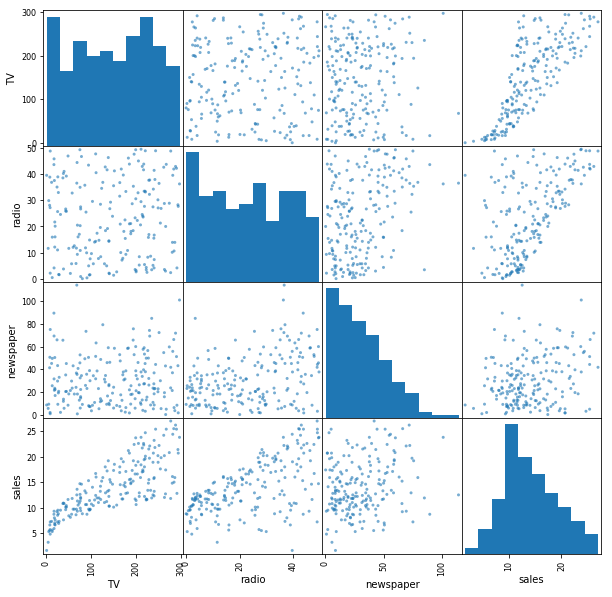

In [4]:
from pandas.plotting import scatter_matrix 

scatter_matrix(df,figsize= (10, 10), alpha=0.6, diagonal = 'hist')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

It seems that TV and sales are positively correlated with each other, because as TV increases, sales increases.

Similarly, radio and sales seems to be positively correlated with each other, becuase as radio increases, sales increases.

Other variables seems not correlated with each other, because as one increases, the other is not affected.

We can confirm the above observation by computing the correlation between different varables. (See the cell below)

In [5]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


From the correlation matrix, we see that the correlation between TV and sales is 0.782, which is a strong correlation, and the correlation between radio is 0.576, which is also a strong correlation. 

But, the correlation between newspaper and sales is only 0.228, which is relatively low.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
y = df['sales']

b) Set X to be just the features described above in df

In [8]:
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
# Randomly split the targets into training/testing sets, 80% for training, 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)


d) Train model on training data, and make predictions on testing data

In [10]:
# Code here
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [11]:
# Code here
regr.score(X_test, y_test)

0.91247950913289455

The $R^2$ is good, because it is close to 1 and it is not exactly 1.
From the lecture, we know that the $R^2$ value is obtained by
$$R^2 = 1 - \frac{\sum^N_{i=1}\left(f(x_i) - {y_i} \right)^2}{\sum^N_{i=1}\left(y_i - \bar y \right)^2}$$
An $R^2$ value of 0.916 means that our model is able to explain 91.6% of variance, and this is good.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

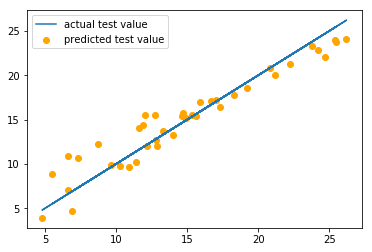

In [12]:
# Code here
plt.scatter(y_test,regr.predict(X_test),color='orange',label='predicted test value')
plt.plot(y_test,y_test,label='actual test value')
plt.legend()

From the plot, the model seems pretty good, and there can be some outliers.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [13]:
# Code/explanation here
# Before looking at the coeffients, we need to normalize each feature to have zero mean and unit variance 
#(i.e. To compare coefficients, we need to standardize coefficients)
from sklearn import preprocessing

size = len(df)
scaler = preprocessing.StandardScaler()
X_new = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=20)
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

print("The regression coefficients for TV, Radio, newspaper are respectively", regr.coef_)

The regression coefficients for TV, Radio, newspaper are respectively [ 3.78674013  2.79390024  0.03951863]


Comment: From the coefficient matrix, we see that coefficient for "TV" is highest, and coefficient for "newspaper" is the lowest. So, The "TV" feature is the most important feature for sales and has greatest impact on sales. The "newspaper" is least important feature for sales. We can see more directly from the following histogram.

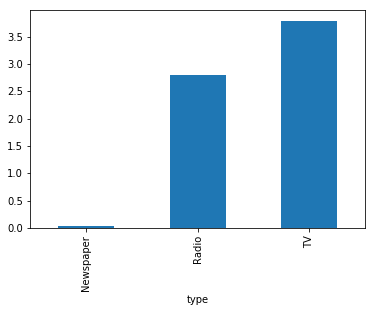

In [14]:
df = pd.DataFrame({'type':['TV' , 'Radio' , 'Newspaper'], 'coef':regr.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Intepretation: We observe that coefficient for newspaper is so low that we can conclude that the sales is independent of dollars of advertisement spent on newspaper. Hence we can drop this feature in our regression model to predict the sales.

The "TV" feature is the most important feature for sales and has the greatest impact on sales. The "newspaper" is the least important feature for sales. This result is consistent with the correlation matrix we obtained before.

We should have standardized each feature in order to measure the importance of the features.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

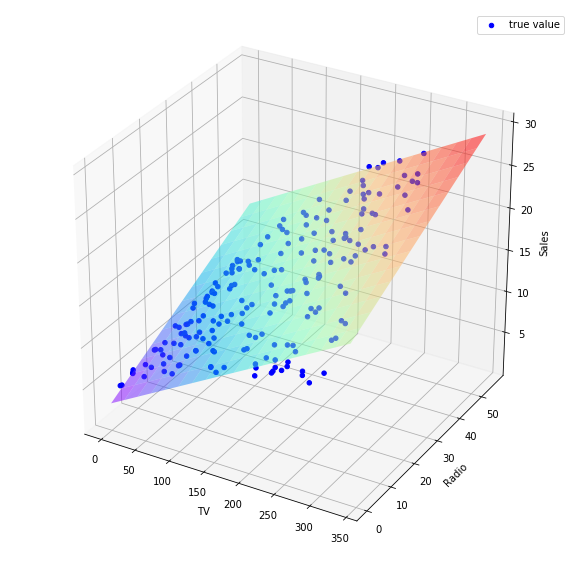

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import cm
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
model = sm.ols(formula='sales ~ TV + radio', data = df)
fit = model.fit()
fit.summary()
x_surf = np.arange(0, 350, 20)
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf, out.values.reshape(x_surf.shape), rstride=1, cstride=1, color='None',
                alpha = 0.5,cmap=cm.rainbow)

ax.scatter(df['TV'], df['radio'], df['sales'], color='b', marker='o', alpha=1, label = 'true value')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.legend()
plt.show()



We see that our hyperplane solution tends to overestimate the sales value when TV and radio values are large. In other words, there can be some non-linear interactions. So, we need to add a non-linear feature in the model.

In [16]:
# Add a non-linear term to improve performance
X['TV*Radio']=X['TV']*X['radio']
X = X.drop(['newspaper'],1)

R^2 value is 0.973806266646


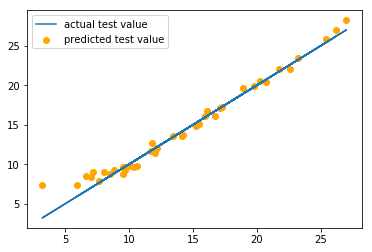

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)
regr = LinearRegression()
regr.fit(X_train, y_train)
plt.scatter(y_test,regr.predict(X_test),color='orange',label='predicted test value')
plt.plot(y_test,y_test,label='actual test value')
plt.legend()
print("R^2 value is", regr.score(X_test, y_test))

From the plot, we see that after we add the non-linear feature in the model, the prediction is better than the previous result we got. The $R^2$ increases to 0.974, which means this non-linear model is able to explain 97.4% of the variance.

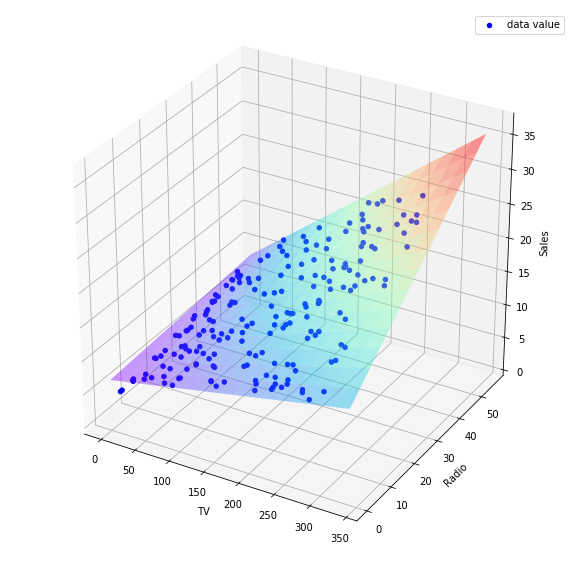

In [18]:
model = sm.ols(formula='sales ~ TV + radio + TV * radio', data = df)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.rainbow)

# Create scatter plot
ax.scatter(df['TV'], df['radio'], df['sales'],
           c='blue',
           marker='o',
           alpha=1,label = 'data value')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.legend()
plt.show()

Now the hyperplane is able to capture most of our data.

R^2 value from the decision tree regression is 0.977895120732


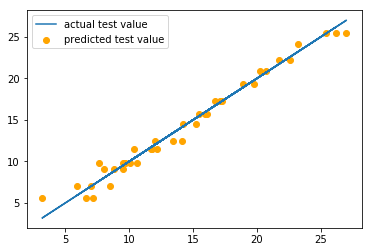

In [19]:
# Another way to improve performance is to use non-parametric model (i.e. decision tree classifier)
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)
regr = DecisionTreeRegressor(max_depth=4)
regr.fit(X_train, y_train)
plt.scatter(y_test,regr.predict(X_test),color='orange',label='predicted test value')
plt.plot(y_test,y_test,label='actual test value')
plt.legend()
print("R^2 value from the decision tree regression is", regr.score(X_test, y_test))

The non-parametric model also enhances the performance, and gives us high $R^2$ value.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


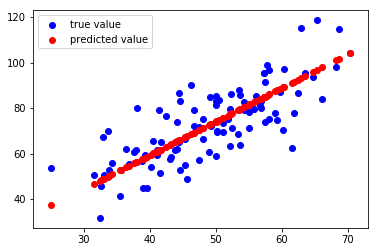

In [20]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate = 0.0001):
    points = genfromtxt('data.csv', delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    plt.scatter(points[:,0],points[:,1],color='b', label = 'true value')
    plt.scatter(points[:,0],m*points[:,0]+b,color='r', label = 'predicted value')
    plt.legend()

run(100)


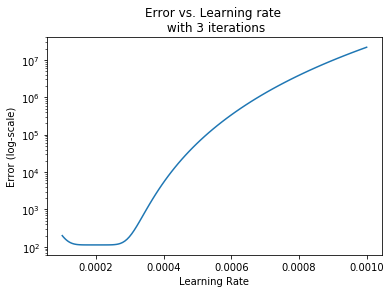

In [21]:
points = genfromtxt("data.csv", delimiter=",")

initial_b = 0 # initialize y-intercept 
initial_m = 0 # initialize slope 
num_iterations = 3
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error (log-scale)')
plt.title("Error vs. Learning rate \n with 3 iterations")

plt.semilogy(learning_rates,errors)
plt.show()


From the plot we observe that when learning rate is between 0.0001 and 0.0003, the error is smallest. With 3 iterations, when learning rate becomes greater than 0.0003, the error increases with the learning rate. This implies that the solution diverges eventually.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


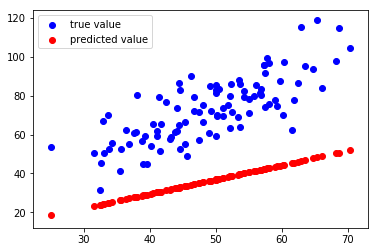

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


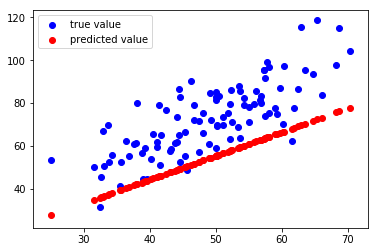

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


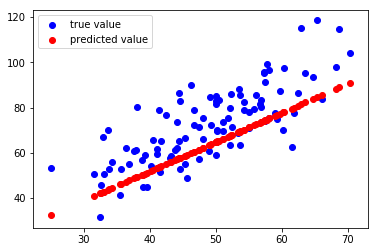

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


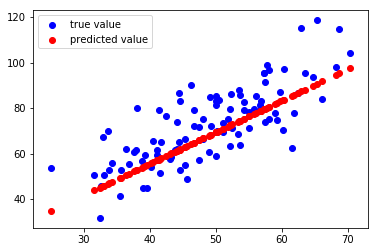

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


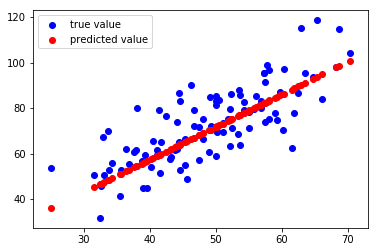

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


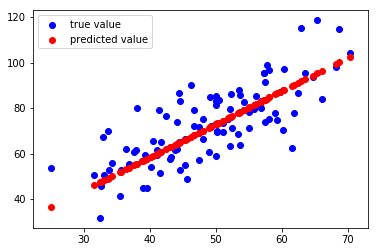

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


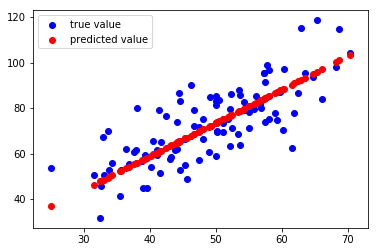

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


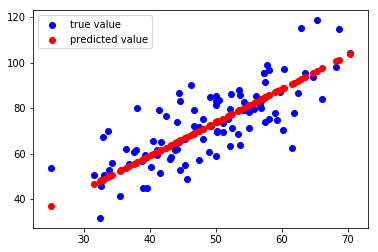

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


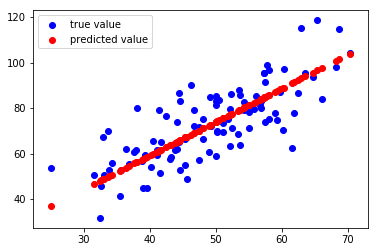

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


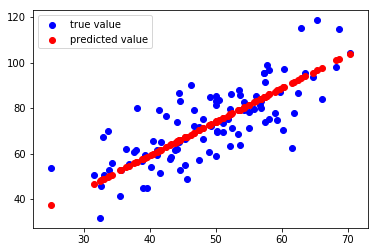

In [22]:
# Use this to visually discuss convergence rate based on learning rate
learning_rate = 0.0001
for num in range(1,11):
    run(num,learning_rate)
    plt.show()
# The result shows that when learning rate= 0.0001, the solution converges fast.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 1.4547010110737295, m = 73.70702973591052, error = 13005291.973556822


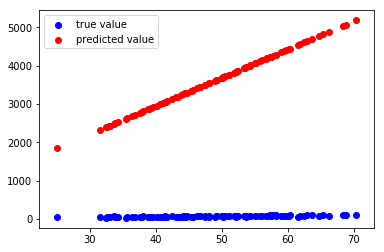

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -69.29117059663433, m = -3526.03734419513, error = 31019902536.469383


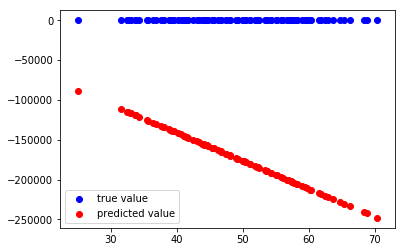

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 3386.1281598926735, m = 172279.96081408733, error = 73988548887160.3


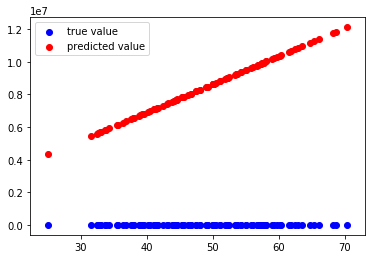

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -165370.96267269718, m = -8413815.837412365, error = 1.764771949187797e+17


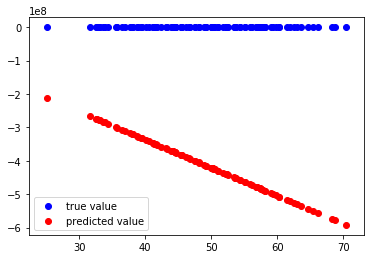

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 8076467.286535983, m = 410917957.6920109, error = 4.209327091134902e+20


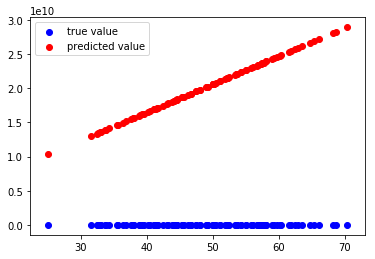

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -394442294.3119351, m = -20068603867.60211, error = 1.004007037187825e+24


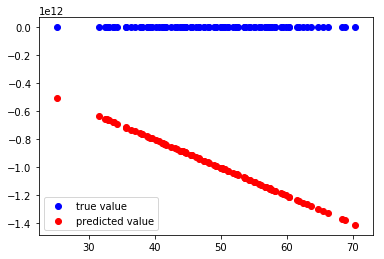

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 19263957769.165703, m = 980119888081.117, error = 2.3947536242684673e+27


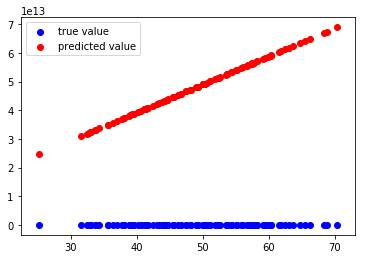

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -940822204463.576, m = -47867554777403.5, error = 5.711956897244446e+30


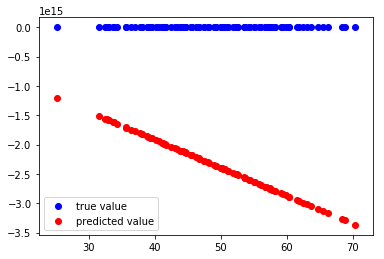

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 45948316074067.5, m = 2337778090451000.5, error = 1.362413705749997e+34


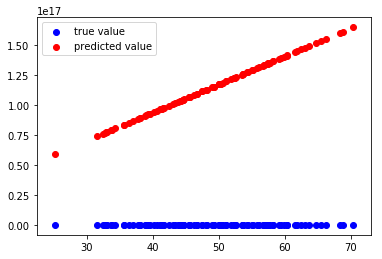

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = -2244045410520457.5, m = -1.1417350281641032e+17, error = 3.2496237962000233e+37


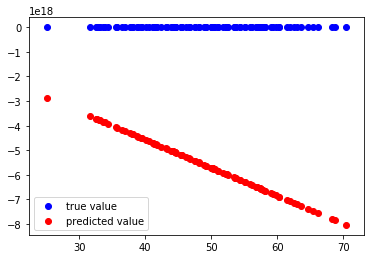

In [23]:
learning_rate = 0.01
for num in range(1,11):
    run(num,learning_rate)
    plt.show()
# The result shows that when learning rate= 0.01, the solution diverges, and so this is a bad learning rate.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


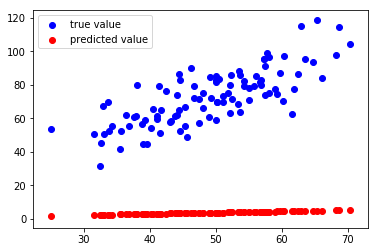

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


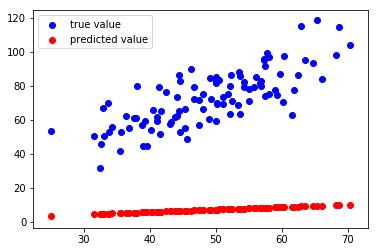

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


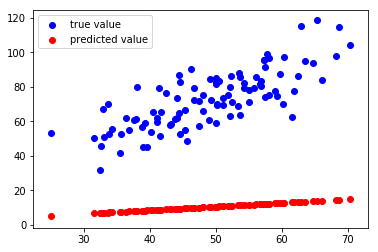

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


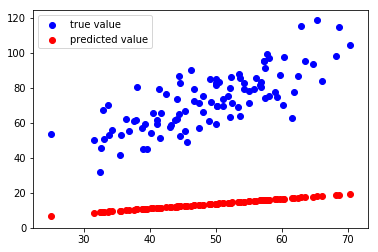

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


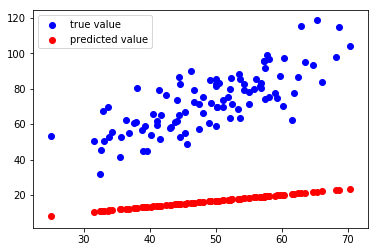

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


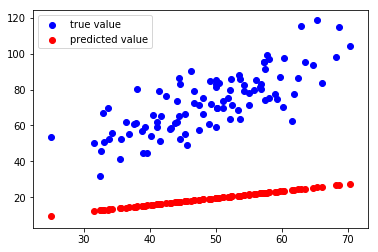

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


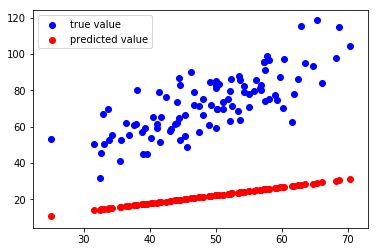

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


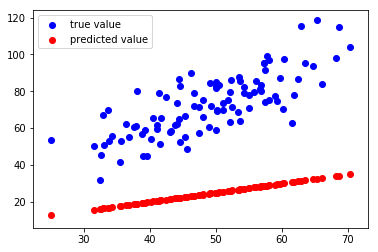

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


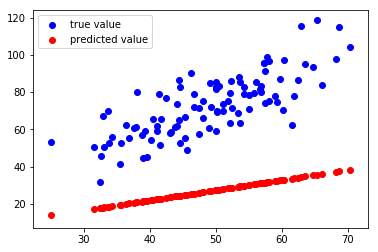

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.011694288874113378, m = 0.5919283357463264, error = 2073.937530133058


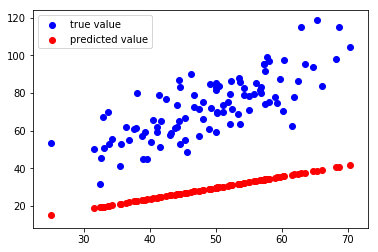

In [24]:
learning_rate = 0.00001
for num in range(1,11):
    run(num,learning_rate)
    plt.show()
# The result shows that when learning rate= 0.00001, the solution does not diverge, but it converges very slow. 
# So, this is inefficient.

Summary of the result:
1. when learning rate= 0.0001, the solution converges fast.
2. when learning rate= 0.01, the solution diverges.
3. when learning rate= 0.00001, the solution converges very slow. So, this learning rate is inefficient.

Explanation:
The gradient descent is used to find the parameters $\beta$ that can minimize the error $\mathscr{L}(\beta)$.
The gradient descent is based on the following algorithm:
$$\beta_n = \beta_{n-1} - \kappa \nabla_{\beta}\mathscr{L}(\beta_{n-1}),$$
where $\kappa$ is our learning rate.

It is clear that if the learning rate $\kappa$ is too small, it may take very long time (i.e. large number of iterations) for the algorithm to find the optimal $\beta^*$. If the learning rate $\kappa$ is too large, it will bypass the optimal $\beta^*$ in each interation, and even diverges away from from the optimal $\beta^*$. 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

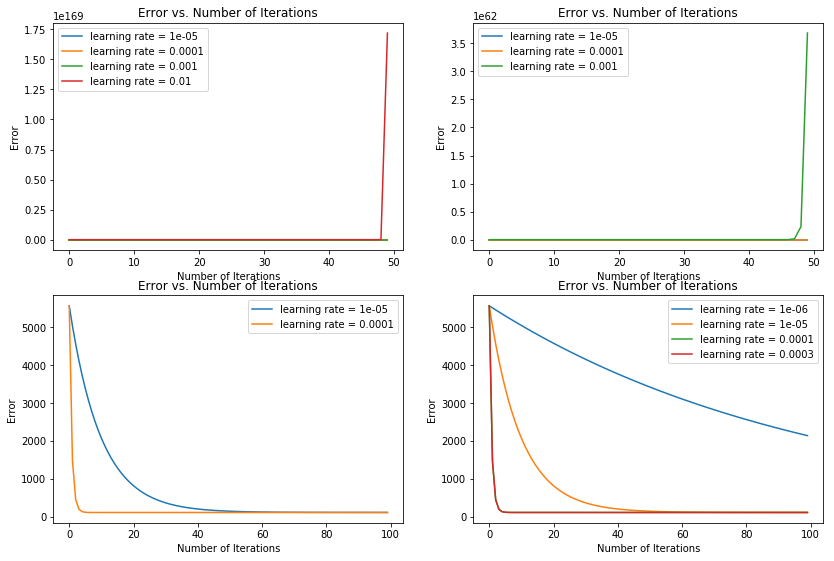

In [25]:
# Let's first look at the following 4 learning rates
learning_rate = np.array([0.00001,0.0001,0.001,0.01])
points = genfromtxt("data.csv", delimiter=",")
max_num= 50
errors=np.zeros((len(learning_rate),max_num))

for (i, l) in enumerate (learning_rate):
    for num in range(0,max_num):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, l, num)
        errors[i,num]=compute_error_for_line_given_points(b, m, points)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.3)
fig.set_figheight(fig.get_figheight() * 2.3)
axes = fig.add_subplot(2, 2, 1)
for (i, l) in enumerate (learning_rate):
    axes.plot(np.arange(0, max_num),errors[i,:], label = 'learning rate = {0}'.format(l))
    
axes.set_xlabel('Number of Iterations')
axes.set_ylabel('Error')
axes.set_title('Error vs. Number of Iterations')
plt.legend()    


# Let's drop the 0.01, and only look at the three rates
learning_rate = np.array([0.00001,0.0001,0.001])
max_num= 50
errors=np.zeros((len(learning_rate),max_num))

for (i, l) in enumerate (learning_rate):
    for num in range(0, max_num):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, l, num)
        errors[i,num]=compute_error_for_line_given_points(b, m, points)

axes = fig.add_subplot(2, 2, 2)
for (i, l) in enumerate (learning_rate):
    axes.plot(np.arange(0,max_num),errors[i,:], label = 'learning rate = {0}'.format(l))

axes.set_xlabel('Number of Iterations')
axes.set_ylabel('Error')
axes.set_title('Error vs. Number of Iterations')
plt.legend()  


# Let's drop the 0.001, and only look at the two rates
learning_rate = np.array([0.00001,0.0001])
max_num= 100
errors=np.zeros((len(learning_rate),max_num))

for (i, l) in enumerate (learning_rate):
    for num in range(0,max_num):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, l, num)
        errors[i,num]=compute_error_for_line_given_points(b, m, points)

axes = fig.add_subplot(2, 2, 3)
for (i, l) in enumerate (learning_rate):
    axes.plot(np.arange(0,max_num),errors[i,:], label = 'learning rate = {0}'.format(l))
axes.set_xlabel('Number of Iterations')
axes.set_ylabel('Error')
axes.set_title('Error vs. Number of Iterations')
plt.legend()

# Let's add 0.003 and 0.001, and compare the four rates
learning_rate = np.array([0.000001, 0.00001,0.0001,0.0003])
max_num= 100
errors=np.zeros((len(learning_rate),max_num))

for (i, l) in enumerate (learning_rate):
    for num in range(0,max_num):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, l, num)
        errors[i,num]=compute_error_for_line_given_points(b, m, points)

axes = fig.add_subplot(2, 2, 4)
for (i, l) in enumerate (learning_rate):
    axes.plot(np.arange(0,max_num),errors[i,:], label = 'learning rate = {0}'.format(l))
axes.set_xlabel('Number of Iterations')
axes.set_ylabel('Error')
axes.set_title('Error vs. Number of Iterations')
plt.legend()



plt.show()

From the first plot it is obvious that when the learning rate $\kappa$ = 0.01, the error goes to infinity as number of iterations increases, so the solution diverges.

Similarly, in the second plot, when learning rate $\kappa$ = 0.001, the error goes to infinity, so the solution diverges.

In the third plot, we observe that error goes to 0 for both $\kappa = 0.00001$ and $\kappa =0.0001$. But, error with $\kappa =0.0001$ converges to much faster than error with $\kappa = 0.00001$. It only takes a few iterations for $\kappa=0.0001$ to converge, but it takes about 40 iterations for $\kappa = 0.00001$ to converge.  This is consistent with what we observe in the part I that small learning rate $\kappa = 0.00001$ is inefficient.

In the fourth plot, we observe that $\kappa=0.000001$ is more inefficient than  $\kappa=0.00001$. $\kappa=0.0003$ is as efficient as $\kappa=0.0001.$

Hence, based on the observations above, we can conclude that:
1. If the learning rate is too small, then gradient descent will need to be run a lot of times to reach the optimum (and potentially never reaching the optimum).
2. If the learning rate is too big, then the gradient descent will be unstable (bouncing around the optimum, and may even diverge).